### I. Preprocessing of the dataset

In [101]:
# Load the dataset
import pandas as pd
df=pd.read_csv("Red_wine_quality.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [102]:
# Remove the outliers from the predictor variables
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit(df)
outlier_label=pd.DataFrame(clf.predict(df))
outlier_label=outlier_label.rename(columns={0:"outlier_label"})
outlier_label

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


,outlier_label
0,1
1,1
2,1
3,1
4,1
...,...
1594,1
1595,1
1596,1
1597,1


In [103]:
# Concatenate the predictor variables and the outlier column. 
df = pd.concat([df,outlier_label], axis=1, sort=False)
df=df.loc[df["outlier_label"] == 1]
df=df.drop(["outlier_label"],axis=1)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The original dataset has 1599 rows. The dataset with the outlier removed has 1439 rows. So, IsolationForest detected and removed 160 outliers from the predictor variables.

I have seperated the outliers and had shown before that removing outliers improved model performance. How about implementing a feature selection algorithm as well? Let's see if feature selection would further enhance model performance. The dataset contains numeric inputs (the predictor variables) and categorical output (the target variable). So, I am going to use univariate selection. Univariate selection uses statistical tests to select the features that have the strongest relation with the target variable.

In [4]:
# Seperate the predictor variables and target variables.
X=df.drop(["quality"],axis=1)
y=df[["quality"]]
print(X.shape)
print(y.shape)

(1439, 11)
(1439, 1)


In [5]:
# Import the libraries.
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_classif, k=11)
fit = test.fit(X, y)
features = fit.transform(X)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[  7.407  49.62   20.854   1.672   3.832   5.767  35.146  11.318   4.025
  42.88  101.707]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# Sort the feature scores in ascending order.
scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"])

,scores
3,1.672070
4,3.832117
8,4.024580
5,5.767481
0,7.407470
7,11.318385
2,20.853718
6,35.145856
9,42.880299
1,49.619682


The most important feature has column index 6. That is "total_sulfur_dioxide". The least important feature has column index 7. That is density.

I am going to select the 8 most important features to use the multilable neural network model and the multilable decision tree model. Namely, I am going to count 8 features, starting from the bottom of the list above.

In [7]:
X = X.iloc[:, [10,1,9,6,2,7,0,5]]
X

,alcohol,volatile_acidity,sulphates,total_sulfur_dioxide,citric_acid,density,fixed_acidity,free_sulfur_dioxide
0,9.4,0.700,0.56,34.0,0.00,0.99780,7.4,11.0
1,9.8,0.880,0.68,67.0,0.00,0.99680,7.8,25.0
2,9.8,0.760,0.65,54.0,0.04,0.99700,7.8,15.0
3,9.8,0.280,0.58,60.0,0.56,0.99800,11.2,17.0
4,9.4,0.700,0.56,34.0,0.00,0.99780,7.4,11.0
...,...,...,...,...,...,...,...,...
1594,10.5,0.600,0.58,44.0,0.08,0.99490,6.2,32.0
1595,11.2,0.550,0.76,51.0,0.10,0.99512,5.9,39.0
1596,11.0,0.510,0.75,40.0,0.13,0.99574,6.3,29.0
1597,10.2,0.645,0.71,44.0,0.12,0.99547,5.9,32.0


In [8]:
# Standardized the new dataset that has the outliers removed and contain only the 8 most important features.
from sklearn import preprocessing
names=X.columns
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X, columns=names)
X

,alcohol,volatile_acidity,sulphates,total_sulfur_dioxide,citric_acid,density,fixed_acidity,free_sulfur_dioxide
0,-0.992633,1.029101,-0.612141,-0.336082,-1.405793,0.673407,-0.548791,-0.451312
1,-0.586054,2.090154,0.277403,0.776855,-1.405793,0.059232,-0.292828,1.024563
2,-0.586054,1.382785,0.055017,0.338425,-1.188809,0.182067,-0.292828,-0.029633
3,-0.586054,-1.446689,-0.463884,0.540777,1.631974,0.796243,1.882859,0.181206
4,-0.992633,1.029101,-0.612141,-0.336082,-1.405793,0.673407,-0.548791,-0.451312
...,...,...,...,...,...,...,...,...
1434,0.125461,0.439627,-0.463884,0.001172,-0.971826,-1.107701,-1.316681,1.762500
1435,0.836976,0.144890,0.870433,0.237249,-0.863334,-0.972582,-1.508653,2.500438
1436,0.633686,-0.090899,0.796304,-0.133730,-0.700597,-0.591793,-1.252690,1.446241
1437,-0.179474,0.704890,0.499789,0.001172,-0.754843,-0.757621,-1.508653,1.762500


In [9]:
# split the dataset into train set and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

### II. Multilable neural network

In [10]:
length=X_train.shape[1]
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_test.shape[1]

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [11]:
# Load the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense

# define classification model

def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(length, activation='relu', input_shape=(length,)))
    model.add(Dense(550, activation='tanh'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model=classification_model()
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=20, verbose=2)
model.evaluate(X_test,y_test,verbose=0)

Train on 1079 samples, validate on 360 samples
Epoch 1/20
 - 1s - loss: 1.4473 - acc: 0.5162 - val_loss: 1.0113 - val_acc: 0.6139
Epoch 2/20
 - 1s - loss: 1.0260 - acc: 0.5792 - val_loss: 0.9100 - val_acc: 0.6222
Epoch 3/20
 - 1s - loss: 0.9587 - acc: 0.5922 - val_loss: 0.8889 - val_acc: 0.6111
Epoch 4/20
 - 1s - loss: 0.9282 - acc: 0.6006 - val_loss: 0.8549 - val_acc: 0.6389
Epoch 5/20
 - 0s - loss: 0.9101 - acc: 0.6070 - val_loss: 0.8551 - val_acc: 0.6556
Epoch 6/20
 - 0s - loss: 0.8960 - acc: 0.6061 - val_loss: 0.8413 - val_acc: 0.6444
Epoch 7/20
 - 0s - loss: 0.8860 - acc: 0.6080 - val_loss: 0.8323 - val_acc: 0.6500
Epoch 8/20
 - 0s - loss: 0.8801 - acc: 0.6154 - val_loss: 0.8281 - val_acc: 0.6444
Epoch 9/20
 - 1s - loss: 0.8753 - acc: 0.6108 - val_loss: 0.8288 - val_acc: 0.6417
Epoch 10/20
 - 0s - loss: 0.8712 - acc: 0.6219 - val_loss: 0.8269 - val_acc: 0.6500
Epoch 11/20
 - 0s - loss: 0.8649 - acc: 0.6126 - val_loss: 0.8475 - val_acc: 0.6361
Epoch 12/20
 - 1s - loss: 0.8663 - acc

[0.8316654629177518, 0.6611111111111111]

The model with the outliers removed and feature seledction has an accuracy of 66%. That is a 2% improvement from the model with outliers remove but no feature selection and an 8% improvement from the first model built with the entire dataset and no feature selection.

### III. Multilable decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
WineQuality=DecisionTreeClassifier(criterion="entropy",max_depth=20,random_state=12)
WineQuality

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [17]:
WineQuality.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [18]:
pred_quality=WineQuality.predict(X_test)
from sklearn import metrics
print("Decision tree's accuracy is: ",metrics.accuracy_score(y_test,pred_quality))

Decision tree's accuracy is:  0.6444444444444445


An accuracy of 64%. Feature selection improved the performance of the neural network model, but does not help the decision tree model.

### IV. Neural network for regression

For regression, we will use a different feature selection function. We will use the "f_regression" function.

In [22]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X_reg=df.drop(["quality"],axis=1)
# feature extraction. We are going to output the selection scores for all features and select the features with the highest scores.
test = SelectKBest(score_func=f_regression, k="all")
fit = test.fit(X_reg, y)
features = fit.transform(X_reg)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 34.346 240.672  92.543   2.164  10.631   4.285 101.899  39.135   7.171
 208.959 443.008]


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
# Sort the feature scores in ascending order.
scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores.sort_values(by=["scores"])

,scores
3,2.164462
5,4.285292
8,7.171287
4,10.631403
0,34.346219
7,39.135226
2,92.543142
6,101.899043
9,208.958966
1,240.671639


In [24]:
X_reg = X_reg.iloc[:, [10,1,9,6,2,7,0,4]]
X_reg

,alcohol,volatile_acidity,sulphates,total_sulfur_dioxide,citric_acid,density,fixed_acidity,chlorides
0,9.4,0.700,0.56,34.0,0.00,0.99780,7.4,0.076
1,9.8,0.880,0.68,67.0,0.00,0.99680,7.8,0.098
2,9.8,0.760,0.65,54.0,0.04,0.99700,7.8,0.092
3,9.8,0.280,0.58,60.0,0.56,0.99800,11.2,0.075
4,9.4,0.700,0.56,34.0,0.00,0.99780,7.4,0.076
...,...,...,...,...,...,...,...,...
1594,10.5,0.600,0.58,44.0,0.08,0.99490,6.2,0.090
1595,11.2,0.550,0.76,51.0,0.10,0.99512,5.9,0.062
1596,11.0,0.510,0.75,40.0,0.13,0.99574,6.3,0.076
1597,10.2,0.645,0.71,44.0,0.12,0.99547,5.9,0.075


In [25]:
names=X_reg.columns
scaler=preprocessing.StandardScaler()
X_reg=scaler.fit_transform(X)
X_reg=pd.DataFrame(X_reg, columns=names)
X_reg

,alcohol,volatile_acidity,sulphates,total_sulfur_dioxide,citric_acid,density,fixed_acidity,chlorides
0,-0.992633,1.029101,-0.612141,-0.336082,-1.405793,0.673407,-0.548791,-0.451312
1,-0.586054,2.090154,0.277403,0.776855,-1.405793,0.059232,-0.292828,1.024563
2,-0.586054,1.382785,0.055017,0.338425,-1.188809,0.182067,-0.292828,-0.029633
3,-0.586054,-1.446689,-0.463884,0.540777,1.631974,0.796243,1.882859,0.181206
4,-0.992633,1.029101,-0.612141,-0.336082,-1.405793,0.673407,-0.548791,-0.451312
...,...,...,...,...,...,...,...,...
1434,0.125461,0.439627,-0.463884,0.001172,-0.971826,-1.107701,-1.316681,1.762500
1435,0.836976,0.144890,0.870433,0.237249,-0.863334,-0.972582,-1.508653,2.500438
1436,0.633686,-0.090899,0.796304,-0.133730,-0.700597,-0.591793,-1.252690,1.446241
1437,-0.179474,0.704890,0.499789,0.001172,-0.754843,-0.757621,-1.508653,1.762500


In [32]:
num_cols=X_reg.shape[1]
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(150, activation='relu', input_shape=(num_cols,)))
    model.add(Dense(150, activation='relu'))
    model.add(Dense(150, activation ='relu'))
    model.add(Dense(150,activation='tanh'))
    model.add(Dense(1))
# "50" is the number of nodes in each of the three hidden layers.    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [34]:
# build the model
model = regression_model()

In [35]:
# fit the model
model.fit(X, y, validation_split=0.3, epochs=15, verbose=2)

Train on 1007 samples, validate on 432 samples
Epoch 1/15
 - 2s - loss: 6.6881 - val_loss: 1.4216
Epoch 2/15
 - 1s - loss: 0.9681 - val_loss: 0.8453
Epoch 3/15
 - 1s - loss: 0.5360 - val_loss: 0.5056
Epoch 4/15
 - 1s - loss: 0.3806 - val_loss: 0.5155
Epoch 5/15
 - 1s - loss: 0.3606 - val_loss: 0.3897
Epoch 6/15
 - 1s - loss: 0.3450 - val_loss: 0.3938
Epoch 7/15
 - 1s - loss: 0.3279 - val_loss: 0.3879
Epoch 8/15
 - 1s - loss: 0.3231 - val_loss: 0.3738
Epoch 9/15
 - 1s - loss: 0.3138 - val_loss: 0.3815
Epoch 10/15
 - 1s - loss: 0.3209 - val_loss: 0.5341
Epoch 11/15
 - 1s - loss: 0.3230 - val_loss: 0.4009
Epoch 12/15
 - 1s - loss: 0.3010 - val_loss: 0.3786
Epoch 13/15
 - 1s - loss: 0.2924 - val_loss: 0.4323
Epoch 14/15
 - 1s - loss: 0.3060 - val_loss: 0.4080
Epoch 15/15
 - 1s - loss: 0.2891 - val_loss: 0.3920


In [36]:
import math
print ("The root mean square error is: ", math.sqrt(0.3920))

The root mean square error is:  0.6260990336999411


This is a significant improvemet, comparing to the original regression model for which the RMSE was 0.882. Removing outliers and using feature selection improves the neural network regression model.

Visualize how the actual wine quality score compares to the wine quality scores predicted by the neural network regression model.

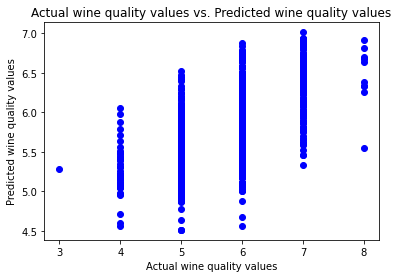

In [38]:
import matplotlib.pyplot as plt
y_pred=model.predict(X_reg)

plt.scatter(y, y_pred,color='blue')
plt.title('Actual wine quality values vs. Predicted wine quality values')
plt.xlabel('Actual wine quality values')
plt.ylabel('Predicted wine quality values')
plt.show()

It seems that the model performs better on the wines with higher quality scores.

### V. Analysis of the outlier wines: are there wines that are exceptionally good or especially poor?

In [91]:
df=pd.concat([df,outlier_label], axis=1, sort=False)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,outlier_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [92]:
df_outlier=df.loc[df["outlier_label"] == -1]
df_outlier

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,outlier_label
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5,-1
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5,-1
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5,-1
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6,-1
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5,-1
1477,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.6,7,-1
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,-1
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5,-1


Let's see if there is any exceptionally good red wines among the outlier wines. The exceptionally good red wines in the dataset have quality score of 8.

In [93]:
exceptionally_good=df_outlier[df_outlier["quality"]==8]
exceptionally_good

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,outlier_label
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,-1
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,-1
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,-1
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,-1
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8,-1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,-1
1090,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8,-1
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8,-1


In [94]:
especially_poor=df_outlier[df_outlier["quality"]==3]
especially_poor

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,outlier_label
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,-1
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,-1
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,-1
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,-1
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,-1
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,-1
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3,-1
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3,-1
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,-1


In [95]:
print("There are ",len(exceptionally_good)," botttles of exceptionally good wines.") 

There are  8  botttles of exceptionally good wines.


In [96]:
print("There are ",len(especially_poor)," botttles of especially poor wines.") 

There are  9  botttles of especially poor wines.


Out of the pack of 1,599, 0.5% is exceptionally good red wines and 0.56% is especially poor red wines. It is very rare that we encounter exceptionally good red wines or espeically poor red wines. Most of the wines we see are either of medium or medium-high quality.

By the way, a comparison of the results above show some interesting differences between exceptionally good red wines and especially poor red wines. The exceptionally good red wines have (1) lower volatile acidity; (2) higher citric acid; (3) lower chloride (all of the good wines have chloride lower than 0.1); (4) higher sulphates and (5) higher alcohol.

### VI. Analysis and visualization of the non-outlier wines.

The above are the elits and underachievers of the pack. What are the characteristics of the rest of the wines that are in between, namely, the ones that were used to build the models? For those regular wines, we will compute the average of each attributes.

A comparison of the classification feature selection and the regression feature selection shows that, among the 8 features selected by both algorithms, the first 7 are the same, the only difference is the 8th one: the classification algorithm selected "free_sulfur_dioxide", whereas the regression feature selected "chloride". So, we will compute the averages for the first 7 features, plus the averages for "free_sulfure_dioxide" and "chloride". Let's form new subset of the data with these features.

In [104]:
df_avg=df[["alcohol","volatile_acidity", "sulphates","total_sulfur_dioxide","citric_acid","density","fixed_acidity","free_sulfur_dioxide","chlorides","quality"]]
df_avg

,alcohol,volatile_acidity,sulphates,total_sulfur_dioxide,citric_acid,density,fixed_acidity,free_sulfur_dioxide,chlorides,quality
0,9.4,0.700,0.56,34.0,0.00,0.99780,7.4,11.0,0.076,5
1,9.8,0.880,0.68,67.0,0.00,0.99680,7.8,25.0,0.098,5
2,9.8,0.760,0.65,54.0,0.04,0.99700,7.8,15.0,0.092,5
3,9.8,0.280,0.58,60.0,0.56,0.99800,11.2,17.0,0.075,6
4,9.4,0.700,0.56,34.0,0.00,0.99780,7.4,11.0,0.076,5
...,...,...,...,...,...,...,...,...,...,...
1594,10.5,0.600,0.58,44.0,0.08,0.99490,6.2,32.0,0.090,5
1595,11.2,0.550,0.76,51.0,0.10,0.99512,5.9,39.0,0.062,6
1596,11.0,0.510,0.75,40.0,0.13,0.99574,6.3,29.0,0.076,6
1597,10.2,0.645,0.71,44.0,0.12,0.99547,5.9,32.0,0.075,5


Output the unique values in the "quality" column.

In [153]:
np.unique(df_avg["quality"])

array([3, 4, 5, 6, 7, 8])

In [168]:
df_avg_3=df_avg.loc[df["quality"] == 3].drop(["quality"],axis=1)
three_mean=pd.DataFrame(df_avg_3.mean()).rename(columns={0:"3"})
three_mean

,3
alcohol,9.950
volatile_acidity,0.760
sulphates,0.630
total_sulfur_dioxide,12.000
citric_acid,0.020
density,0.996
fixed_acidity,6.700
free_sulfur_dioxide,6.000
chlorides,0.078


In [169]:
df_avg_4=df_avg.loc[df["quality"] == 4].drop(["quality"],axis=1)
four_mean=pd.DataFrame(df_avg_4.mean()).rename(columns={0:"4"})

df_avg_5=df_avg.loc[df["quality"] == 5].drop(["quality"],axis=1)
five_mean=pd.DataFrame(df_avg_5.mean()).rename(columns={0:"5"})

df_avg_6=df_avg.loc[df["quality"] == 6].drop(["quality"],axis=1)
six_mean=pd.DataFrame(df_avg_6.mean()).rename(columns={0:"6"})

df_avg_7=df_avg.loc[df["quality"] == 7].drop(["quality"],axis=1)
seven_mean=pd.DataFrame(df_avg_7.mean()).rename(columns={0:"7"})

df_avg_8=df_avg.loc[df["quality"] == 8].drop(["quality"],axis=1)
eight_mean=pd.DataFrame(df_avg_8.mean()).rename(columns={0:"8"})
df_avg_all=pd.concat([three_mean,four_mean,five_mean,six_mean,seven_mean,eight_mean],axis=1,sort=True)
df_avg_all

,3,4,5,6,7,8
alcohol,9.950,10.141667,9.897125,10.592841,11.399695,11.750000
chlorides,0.078,0.079143,0.084810,0.082782,0.076140,0.068900
citric_acid,0.020,0.144048,0.230256,0.265520,0.370000,0.378000
density,0.996,0.996456,0.996980,0.996637,0.996044,0.995291
fixed_acidity,6.700,7.726190,8.072524,8.339262,8.801220,8.450000
free_sulfur_dioxide,6.000,10.261905,16.228435,15.289430,13.207317,11.500000
sulphates,0.630,0.563810,0.598802,0.665973,0.737988,0.756000
total_sulfur_dioxide,12.000,30.142857,54.416933,38.629195,28.506098,22.500000
volatile_acidity,0.760,0.696310,0.574401,0.499379,0.395244,0.405000


In [172]:
df_avg_all=df_avg_all.T
df_avg_all

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,sulphates,total_sulfur_dioxide,volatile_acidity
3,9.950000,0.078000,0.020000,0.996000,6.700000,6.000000,0.630000,12.000000,0.760000
4,10.141667,0.079143,0.144048,0.996456,7.726190,10.261905,0.563810,30.142857,0.696310
5,9.897125,0.084810,0.230256,0.996980,8.072524,16.228435,0.598802,54.416933,0.574401
6,10.592841,0.082782,0.265520,0.996637,8.339262,15.289430,0.665973,38.629195,0.499379
7,11.399695,0.076140,0.370000,0.996044,8.801220,13.207317,0.737988,28.506098,0.395244
8,11.750000,0.068900,0.378000,0.995291,8.450000,11.500000,0.756000,22.500000,0.405000


The averages of the selected features are very different scales. Some features have large averages while some whave very small averages. If all of the features are plotted on the same plot, some of the features will  not be visible. So, we will seperate the features into two groups, in order to enhance visual effect. The first group has small averages while the second group has larger averages.

<AxesSubplot:>

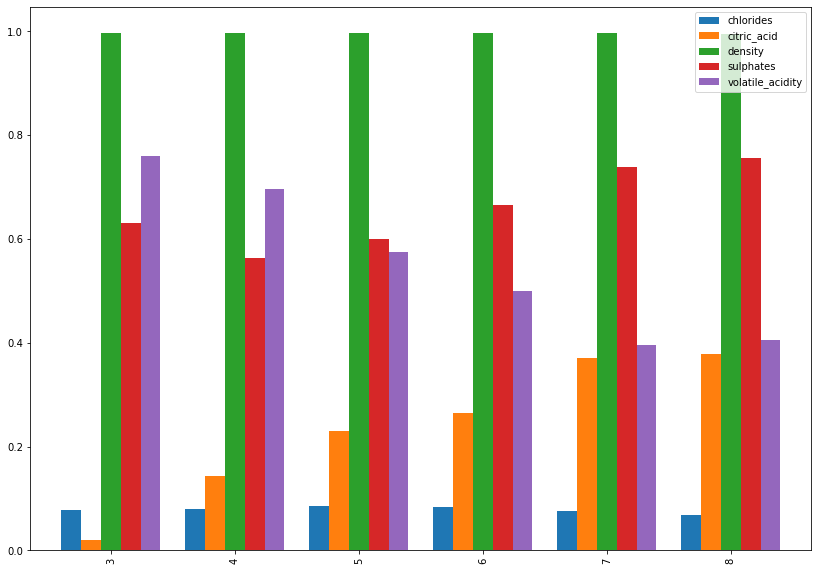

In [188]:
df_avg_all[["chlorides","citric_acid","density","sulphates","volatile_acidity"]].plot.bar(width=0.8,figsize=(14,10))

<AxesSubplot:>

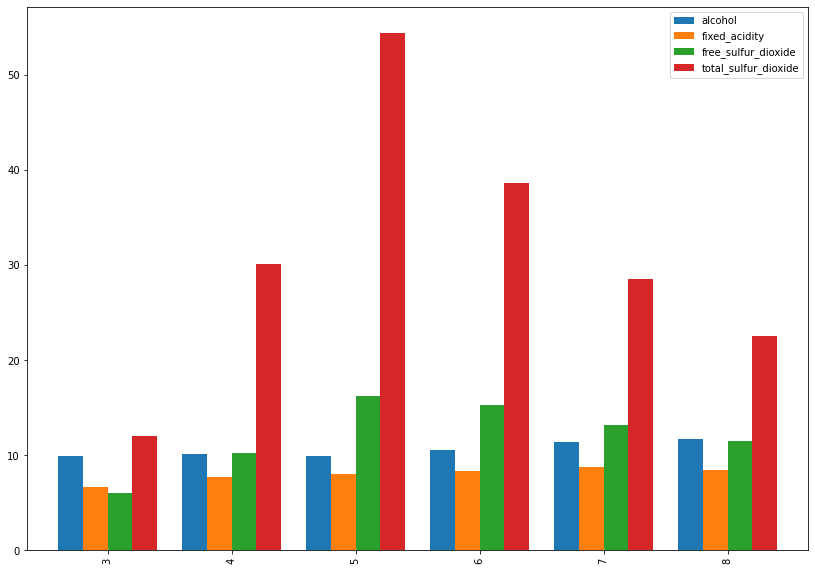

In [187]:
df_avg_all[["alcohol","fixed_acidity","free_sulfur_dioxide","total_sulfur_dioxide"]].plot.bar(width=0.8,figsize=(14,10))

From the graphs, we can see that even for the non-outlier wines, the ones that are neither exceptionally good nor poor, the interesting patterns stated above hold. On average, (1) higher quality wines have higher citric acid; (2) higher quality wines have lower volatile acidity; (3) higher quality wines have higher sulphates. However, for the wines that are neither exceptionally good nor poor, they have approximately the same alcohol volume, as shown by the almost equal-height blue bars in the second graph, whereas the exceptionally good wines have noticeably higher alcohol volume that the ones that are especially poor. This is the major distinction between the exceptionally good wines and the wines that are either exceptionally good  nor poor. 

### VII: Summary

This is the final revision of the notebook. It contains three models: multilabel neural network, multilabel decision tree, neural  network regression. To improve performance, outlier removal algorithm and feature selection algorithms are implemented. This final version also includes two extra sections where (1) the exceptionally good red wines and especially poor red wines are separated from the crowd using outlier removal algorithm and analyzed separately and (2) the non-outlier wines that were used to build the models are plotted to illustrate their common characteristics.